<a href="https://colab.research.google.com/github/nishigandha2/airbnb-booking-analysis/blob/main/AIRBNB_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

**Import Libraries**


In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px

**Mount the drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load The Data**

In [3]:
#creating directory path
dir_path='/content/drive/My Drive/Dataset'

In [4]:
#read dataset and naming it as airbnb data frame
airbnb_df=pd.read_csv("/content/drive/MyDrive/Dataset/Airbnb NYC 2019.csv")

**Data Profiling and Cleansing**

Let’s get a summary of the dataset we have.

In [5]:
#check the index in columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
#check the head
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
#lets describe the price
airbnb_df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

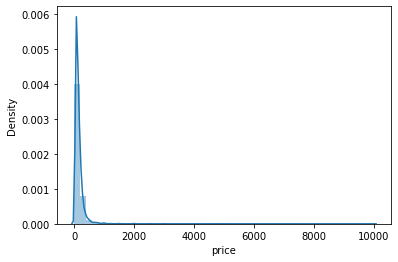

In [8]:
#histogram
sns.distplot(airbnb_df['price']);

In [9]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
#check the information about data and data type
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Now, we drop unnecessary columns such as id, host_name, last_review.

In [11]:
#drop the value which are not required
airbnb_df.drop(['id','host_name','last_review'],axis=1,inplace=True)

In [12]:
#filling the Nan value with zero
airbnb_df.fillna({'reviews_per_month':0},inplace=True)

**Exploration Data and Visualizing**

Explore our data and visualize it to recognize the relationship between the dataset.

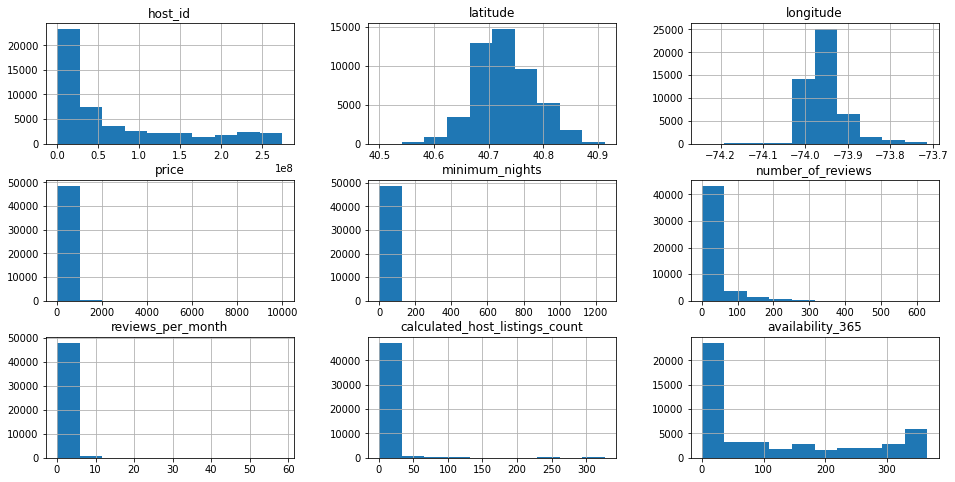

In [13]:
airbnb_df.hist(figsize=(16,8))
plt.show()

In [14]:
#avg price for different type of room type
avg_price=airbnb_df.groupby('room_type')['price'].median().reset_index()

In [15]:
avg_price['price']=avg_price['price'].apply(lambda x:"{0:1.0f}$".format(x))

In [16]:
avg_price

,room_type,price
0,Entire home/apt,160$
1,Private room,70$
2,Shared room,45$


In [17]:
#plotting bar plot
px.bar(data_frame=avg_price,x='room_type',y='price',color='room_type',title='avg price for each type of room(Room type vs Price)')

As we can see from the above bar plot drawn by the plotly, there are three different distinct category of room available on the Airbnb platform with different renting price. So the average price for the rent of entire home/appt ,private room,shared room are 160 ,70  , 45$ respectively.

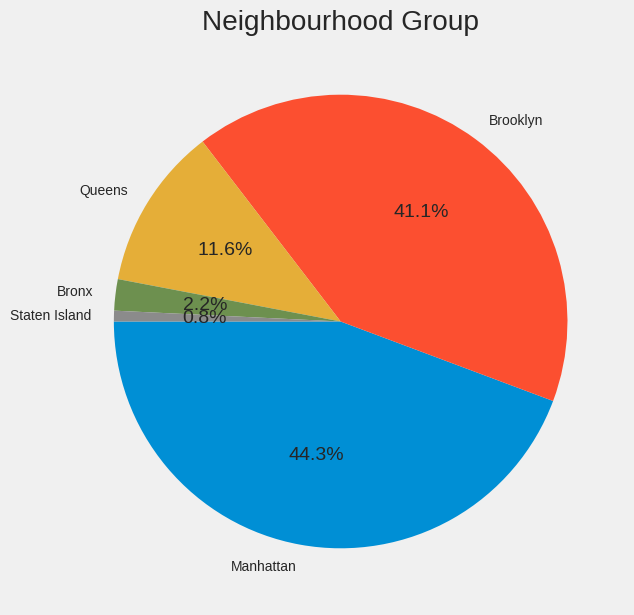

In [26]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(airbnb_df.neighbourhood_group.value_counts(), labels=airbnb_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

The pie chart above shows that Airbnb Listings in Manhattan, and Brooklyn has the highest share of hotels.

Which neighbourhood has the highest listing?

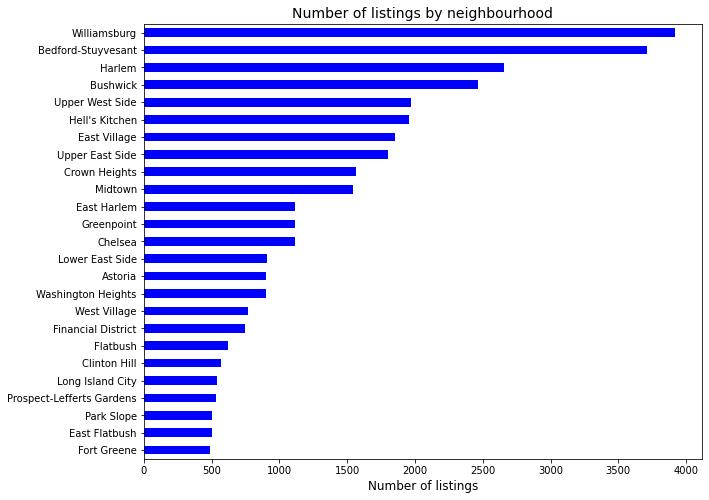

In [20]:
#Seeing which neighborhood has the highest number of listings
feq = airbnb_df['neighbourhood'].value_counts().sort_values(ascending=True)
feq = feq[-25:]
feq.plot.barh(figsize=(10,8), color ='b', width= 0.5)
plt.title('Number of listings by neighbourhood', fontsize=14)
plt.xlabel('Number of listings', fontsize = 12)
plt.show()

Capital Hill has the highest listing. It’s a tourist attraction hence the number of listings could be higher.

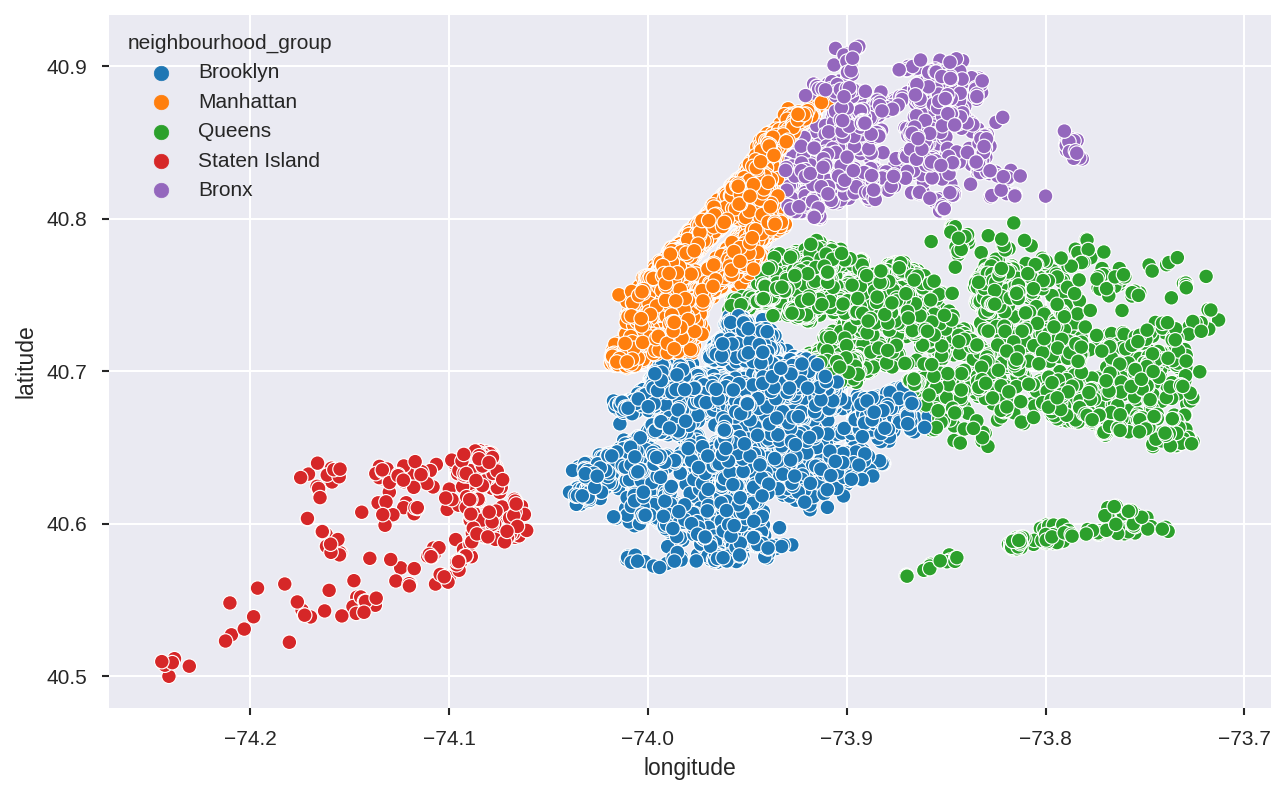

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6), dpi = 150)
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.neighbourhood_group
)
plt.ioff()

From the above scatter plot we visualize disrtibution various neighbourhood_group across NYC